<a href="https://colab.research.google.com/github/Nayantharakp/CODSOFT/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/fraudTest.csv')
df_test=pd.read_csv('/content/fraudTrain.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27230,27230,2020-06-30 08:20:10,180036456789979,"fraud_Streich, Hansen and Veum",gas_transport,73.12,Mackenzie,Salazar,F,982 Melissa Lock,...,42.9207,-91.0685,878.0,Risk analyst,1974-11-20,6f76444c6cc287ddb3407a485901e6bc,1.372580e+09,43.410199,-90.119977,0.0
27231,27231,2020-06-30 08:21:34,4707867759656333,fraud_Towne LLC,misc_pos,3.69,Susan,Shah,F,9016 Jordan Bypass Apt. 516,...,36.7558,-83.1838,581.0,"Psychologist, counselling",1967-02-04,6cba43ce85d06216328e01b37d97fb94,1.372580e+09,36.418842,-83.067039,0.0
27232,27232,2020-06-30 08:21:57,6526955903501879,fraud_Padberg-Welch,grocery_pos,84.05,Jennifer,Scott,F,7351 Cindy Well Suite 099,...,26.3304,-81.5871,276002.0,Medical technical officer,1950-12-14,31c792b9d6f21dc88147d7a7c7e0434f,1.372581e+09,25.873441,-81.589103,0.0
27233,27233,2020-06-30 08:22:09,5152054598359927,"fraud_Mosciski, Gislason and Mertz",grocery_pos,74.56,Jim,Johnson,M,868 Brady Mill Apt. 837,...,29.8872,-90.0331,55581.0,Biomedical scientist,1972-09-12,c71fb27609c52cc9147a98dce6b11806,1.372581e+09,30.430342,-90.735797,0.0


In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [4]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
27230,27230,2020-06-30 08:20:10,180036456789979,"fraud_Streich, Hansen and Veum",gas_transport,73.12,Mackenzie,Salazar,F,982 Melissa Lock,...,42.9207,-91.0685,878.0,Risk analyst,1974-11-20,6f76444c6cc287ddb3407a485901e6bc,1.372580e+09,43.410199,-90.119977,0.0
27231,27231,2020-06-30 08:21:34,4707867759656333,fraud_Towne LLC,misc_pos,3.69,Susan,Shah,F,9016 Jordan Bypass Apt. 516,...,36.7558,-83.1838,581.0,"Psychologist, counselling",1967-02-04,6cba43ce85d06216328e01b37d97fb94,1.372580e+09,36.418842,-83.067039,0.0
27232,27232,2020-06-30 08:21:57,6526955903501879,fraud_Padberg-Welch,grocery_pos,84.05,Jennifer,Scott,F,7351 Cindy Well Suite 099,...,26.3304,-81.5871,276002.0,Medical technical officer,1950-12-14,31c792b9d6f21dc88147d7a7c7e0434f,1.372581e+09,25.873441,-81.589103,0.0
27233,27233,2020-06-30 08:22:09,5152054598359927,"fraud_Mosciski, Gislason and Mertz",grocery_pos,74.56,Jim,Johnson,M,868 Brady Mill Apt. 837,...,29.8872,-90.0331,55581.0,Biomedical scientist,1972-09-12,c71fb27609c52cc9147a98dce6b11806,1.372581e+09,30.430342,-90.735797,0.0
27234,27234,2020-06-30 08:23:48,38859492057661,fraud_Berge LLC,gas_transport,87.99,Edward,Sanchez,M,594 White Dale Suite 530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(27235, 23)

In [6]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27234 entries, 0 to 27233
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27234 non-null  int64  
 1   trans_date_trans_time  27234 non-null  object 
 2   cc_num                 27234 non-null  int64  
 3   merchant               27234 non-null  object 
 4   category               27234 non-null  object 
 5   amt                    27234 non-null  float64
 6   first                  27234 non-null  object 
 7   last                   27234 non-null  object 
 8   gender                 27234 non-null  object 
 9   street                 27234 non-null  object 
 10  city                   27234 non-null  object 
 11  state                  27234 non-null  object 
 12  zip                    27234 non-null  int64  
 13  lat                    27234 non-null  float64
 14  long                   27234 non-null  float64
 15  ci

In [10]:
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],axis=1,inplace=True)

<ipython-input-10-7b69bbf80d45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],axis=1,inplace=True)


In [11]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
gender                    object
city                      object
zip                        int64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [12]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date_trans_time']


<ipython-input-12-7da3e4e1ecef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


0       2020-06-21 12:14:25
1       2020-06-21 12:14:33
2       2020-06-21 12:14:53
3       2020-06-21 12:15:15
4       2020-06-21 12:15:17
                ...        
27229   2020-06-30 08:20:07
27230   2020-06-30 08:20:10
27231   2020-06-30 08:21:34
27232   2020-06-30 08:21:57
27233   2020-06-30 08:22:09
Name: trans_date_trans_time, Length: 27234, dtype: datetime64[ns]

In [13]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month
df.head()

<ipython-input-13-0d0f287f0ce2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['trans_date_trans_time'].dt.hour
<ipython-input-13-0d0f287f0ce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['trans_date_trans_time'].dt.day_name()
<ipython-input-13-0d0f287f0ce2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,month
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,33.986391,-81.200714,0.0,12,Sunday,6
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0.0,12,Sunday,6
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,40.495810,-74.196111,0.0,12,Sunday,6
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767.0,Set designer,1987-07-25,28.812398,-80.883061,0.0,12,Sunday,6
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,44.959148,-85.884734,0.0,12,Sunday,6


In [14]:
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))
df[['merchant']].head()

<ipython-input-14-9f79afec5ba4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))


,merchant
0,Kirlin and Sons
1,Sporer-Keebler
2,"Swaniawski, Nitzsche and Welch"
3,Haley Group
4,Johnston-Casper


In [15]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['age_cust'] = (df['trans_date_trans_time'].dt.year - pd.to_datetime(df['dob']).dt.year).astype(int)
df.head()

<ipython-input-15-51580db0cd8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
<ipython-input-15-51580db0cd8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_cust'] = (df['trans_date_trans_time'].dt.year - pd.to_datetime(df['dob']).dt.year).astype(int)


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,month,age_cust
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,33.986391,-81.200714,0.0,12,Sunday,6,52
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0.0,12,Sunday,6,30
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,40.495810,-74.196111,0.0,12,Sunday,6,50
3,2020-06-21 12:15:15,3591919803438423,Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767.0,Set designer,1987-07-25,28.812398,-80.883061,0.0,12,Sunday,6,33
4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,44.959148,-85.884734,0.0,12,Sunday,6,65


In [16]:
df['lat_dist'] = abs(round(df['merch_lat']-df['lat'],2))
df['long_dist'] = abs(round(df['merch_long']-df['long'],2))

<ipython-input-16-ebc0c88488cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_dist'] = abs(round(df['merch_lat']-df['lat'],2))
<ipython-input-16-ebc0c88488cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['long_dist'] = abs(round(df['merch_long']-df['long'],2))


In [17]:
df.drop(columns=['cc_num','lat','dob','long','merch_lat','merch_long','trans_date_trans_time','zip','city_pop' ],axis=1,inplace=True)

<ipython-input-17-52ff67c9b088>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['cc_num','lat','dob','long','merch_lat','merch_long','trans_date_trans_time','zip','city_pop' ],axis=1,inplace=True)


In [18]:
df

,merchant,category,amt,gender,city,job,is_fraud,hour,day,month,age_cust,lat_dist,long_dist
0,Kirlin and Sons,personal_care,2.86,M,Columbia,Mechanical engineer,0.0,12,Sunday,6,52,0.02,0.27
1,Sporer-Keebler,personal_care,29.84,F,Altonah,"Sales professional, IT",0.0,12,Sunday,6,30,0.87,0.48
2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,"Librarian, public",0.0,12,Sunday,6,50,0.18,0.66
3,Haley Group,misc_pos,60.05,M,Titusville,Set designer,0.0,12,Sunday,6,33,0.24,0.06
4,Johnston-Casper,travel,3.19,M,Falmouth,Furniture designer,0.0,12,Sunday,6,65,0.71,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27229,Predovic Inc,shopping_net,99.38,M,Hewitt,Arts development officer,0.0,8,Tuesday,6,29,0.40,0.45
27230,"Streich, Hansen and Veum",gas_transport,73.12,F,Bagley,Risk analyst,0.0,8,Tuesday,6,46,0.49,0.95
27231,Towne LLC,misc_pos,3.69,F,Cranks,"Psychologist, counselling",0.0,8,Tuesday,6,53,0.34,0.12
27232,Padberg-Welch,grocery_pos,84.05,F,Naples,Medical technical officer,0.0,8,Tuesday,6,70,0.46,0.00


In [19]:
df.dtypes

merchant      object
category      object
amt          float64
gender        object
city          object
job           object
is_fraud     float64
hour           int64
day           object
month          int64
age_cust       int64
lat_dist     float64
long_dist    float64
dtype: object

In [20]:
cor=df.corr()
cor

<ipython-input-20-7a446f931109>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


,amt,is_fraud,hour,month,age_cust,lat_dist,long_dist
amt,1.000000,0.230560,-0.029751,NaN,-0.021721,-0.006160,-0.001457
is_fraud,0.230560,1.000000,0.001101,NaN,0.014569,0.007010,-0.008211
hour,-0.029751,0.001101,1.000000,NaN,-0.180127,0.000239,-0.005623
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_cust,-0.021721,0.014569,-0.180127,NaN,1.000000,-0.006203,-0.000734
lat_dist,-0.006160,0.007010,0.000239,NaN,-0.006203,1.000000,-0.010133
long_dist,-0.001457,-0.008211,-0.005623,NaN,-0.000734,-0.010133,1.000000


<Axes: >

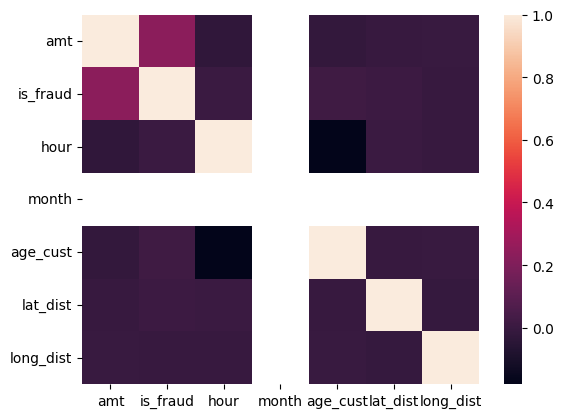

In [21]:
import seaborn as sns
sns.heatmap(cor)

In [22]:
x=df.drop(['is_fraud'],axis=1)
y=df['is_fraud']

In [23]:
#changing categorical values to numerical values
df = pd.get_dummies(df,drop_first = True)
df.head()

,amt,is_fraud,hour,month,age_cust,lat_dist,long_dist,merchant_Abbott-Steuber,merchant_Abernathy and Sons,merchant_Abshire PLC,...,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2.86,0.0,12,6,52,0.02,0.27,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0.0,12,6,30,0.87,0.48,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0.0,12,6,50,0.18,0.66,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,60.05,0.0,12,6,33,0.24,0.06,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.19,0.0,12,6,65,0.71,0.87,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
x=df.drop(['is_fraud'],axis=1)
y=df['is_fraud']

In [25]:
df_test.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
23362,23362,2019-01-14 17:53:07,6538441737335434,fraud_Deckow-Dare,food_dining,2.88,Gina,Grimes,F,444 Robert Mews,...,41.3851,-80.1752,606,Energy manager,1997-09-22,503a2dda2c3ac335b090a77d9a2ed6ba,1326563587,42.093058,-79.510755,0.0
23363,23363,2019-01-14 17:53:29,2254917871818484,fraud_Schroeder Group,health_fitness,19.09,Margaret,Gibson,F,382 Williams Stream Suite 197,...,38.0828,-76.3477,313,Insurance underwriter,1976-03-26,c7d41b37a8c9041bc90f4d5980ccb6ab,1326563609,37.542701,-75.893037,0.0
23364,23364,2019-01-14 17:54:13,213161231269724,fraud_Roob-Okuneva,health_fitness,114.06,Alyssa,Morgan,F,622 Robin Run Suite 764,...,34.0480,-85.9246,67082,Physiological scientist,1963-02-09,e9008a161a61453e1fd2c716425b1b04,1326563653,34.581678,-86.014739,0.0
23365,23365,2019-01-14 17:54:34,213141712584544,fraud_Hermann and Sons,shopping_pos,16.33,Margaret,Curtis,F,742 Oneill Shore,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,65f7dfc9b12bd1be79d0867f1bdc972f,1326563674,32.774707,-91.096222,0.0
23366,23366,2019-01-14 17:54:56,4079773899158,fraud_Boyer-Haley,travel,2.12,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,8bb192be9087b60da4160b94d4464cf9,1326563696,43.991928,-115.730887,NaN


In [26]:
df_test.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [27]:
df_test.shape

(23367, 23)

In [28]:
df_test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 1
dtype: int64

In [29]:
df_test=df_test.dropna()

In [30]:
df_test.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],axis=1,inplace=True)

<ipython-input-30-1260860e7f06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],axis=1,inplace=True)


In [31]:
df_test.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
gender                    object
city                      object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [32]:
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date_trans_time']

<ipython-input-32-bf4ae76ab152>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])


0       2019-01-01 00:00:18
1       2019-01-01 00:00:44
2       2019-01-01 00:00:51
3       2019-01-01 00:01:16
4       2019-01-01 00:03:06
                ...        
23361   2019-01-14 17:53:03
23362   2019-01-14 17:53:07
23363   2019-01-14 17:53:29
23364   2019-01-14 17:54:13
23365   2019-01-14 17:54:34
Name: trans_date_trans_time, Length: 23366, dtype: datetime64[ns]

In [33]:
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour
df_test['day'] = df_test['trans_date_trans_time'].dt.day_name()
df_test['month'] = df_test['trans_date_trans_time'].dt.month
df_test.head()

<ipython-input-33-368eceaf5f3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['hour'] = df_test['trans_date_trans_time'].dt.hour
<ipython-input-33-368eceaf5f3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['day'] = df_test['trans_date_trans_time'].dt.day_name()
<ipython-input-33-368eceaf5f3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0.0,0,Tuesday,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0.0,0,Tuesday,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0.0,0,Tuesday,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0.0,0,Tuesday,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0.0,0,Tuesday,1


In [34]:
df_test['merchant'] = df_test['merchant'].apply(lambda x : x.replace('fraud_',''))
df_test[['merchant']].head()

<ipython-input-34-c2b7e5e9f75f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['merchant'] = df_test['merchant'].apply(lambda x : x.replace('fraud_',''))


,merchant
0,"Rippin, Kub and Mann"
1,"Heller, Gutmann and Zieme"
2,Lind-Buckridge
3,"Kutch, Hermiston and Farrell"
4,Keeling-Crist


In [35]:
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['age_cust'] = (df_test['trans_date_trans_time'].dt.year - pd.to_datetime(df_test['dob']).dt.year).astype(int)
df_test.head()

<ipython-input-35-ec09e827e1dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
<ipython-input-35-ec09e827e1dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['age_cust'] = (df_test['trans_date_trans_time'].dt.year - pd.to_datetime(df_test['dob']).dt.year).astype(int)


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,month,age_cust
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0.0,0,Tuesday,1,31
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0.0,0,Tuesday,1,41
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0.0,0,Tuesday,1,57
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0.0,0,Tuesday,1,52
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0.0,0,Tuesday,1,33


In [36]:
df_test['lat_dist'] = abs(round(df_test['merch_lat']-df_test['lat'],2))
df_test['long_dist'] = abs(round(df_test['merch_long']-df_test['long'],2))

In [37]:
df_test.drop(columns=['cc_num','lat','dob','long','merch_lat','merch_long','trans_date_trans_time','zip','city_pop' ],axis=1,inplace=True)

In [38]:
df_test = pd.get_dummies(df,drop_first = True)
df_test.head()

,amt,is_fraud,hour,month,age_cust,lat_dist,long_dist,merchant_Abbott-Steuber,merchant_Abernathy and Sons,merchant_Abshire PLC,...,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2.86,0.0,12,6,52,0.02,0.27,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0.0,12,6,30,0.87,0.48,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0.0,12,6,50,0.18,0.66,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,60.05,0.0,12,6,33,0.24,0.06,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.19,0.0,12,6,65,0.71,0.87,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
x1=df_test.drop(['is_fraud'],axis=1)
y2=df_test['is_fraud']

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
logit=LogisticRegression()
tree = DecisionTreeClassifier(criterion='entropy')
random = RandomForestClassifier(random_state=42)
models = [logit, tree, random]

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for model in models:
    print(model)
    model.fit(x, y)
    y_pred = model.predict(x1)
    print("Accuracy:", accuracy_score(y2, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y2, y_pred))
    print("Classification Report:\n", classification_report(y2, y_pred))

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9973929646765073
Confusion Matrix:
 [[27115     3]
 [   68    48]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27118
         1.0       0.94      0.41      0.57       116

    accuracy                           1.00     27234
   macro avg       0.97      0.71      0.79     27234
weighted avg       1.00      1.00      1.00     27234

DecisionTreeClassifier(criterion='entropy')
Accuracy: 1.0
Confusion Matrix:
 [[27118     0]
 [    0   116]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27118
         1.0       1.00      1.00      1.00       116

    accuracy                           1.00     27234
   macro avg       1.00      1.00      1.00     27234
weighted avg       1.00      1.00      1.00     27234

RandomForestClassifier(random_state=42)
Accuracy: 1.0
Confusion Matrix:
 [[27118     0]
 [    0   116]]
Classif